In [1]:
import torch

from torchkde.modules import KernelDensity 
from distributions import BartSimpsonDistribution

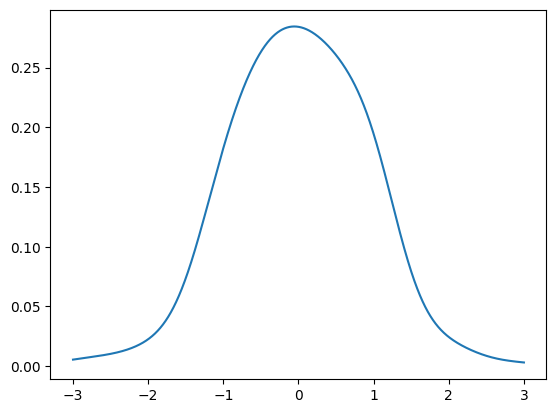

In [ ]:
# Create some data from the "Bart Simpson distribution" (see https://www.stat.cmu.edu/~larry/=sml/densityestimation.pdf)
X = BartSimpsonDistribution().sample((1000,))
# Fit a kernel density estimator to the data
kde = KernelDensity(bandwidth=0.1)
kde.fit(X)
# Evaluate the KDE on a grid
x = torch.linspace(-3, 3, 10000).unsqueeze(-1)
log_prob = kde.score_samples(x)
# Plot the result
import matplotlib.pyplot as plt
plt.plot(x, log_prob.exp())
plt.show()

In [3]:
log_prob[:100]

tensor([-5.0711, -5.0697, -5.0683, -5.0669, -5.0655, -5.0641, -5.0627, -5.0613,
        -5.0599, -5.0585, -5.0572, -5.0558, -5.0544, -5.0530, -5.0516, -5.0502,
        -5.0488, -5.0474, -5.0460, -5.0446, -5.0432, -5.0418, -5.0404, -5.0390,
        -5.0376, -5.0362, -5.0348, -5.0334, -5.0320, -5.0306, -5.0293, -5.0279,
        -5.0265, -5.0251, -5.0237, -5.0223, -5.0209, -5.0195, -5.0181, -5.0167,
        -5.0153, -5.0139, -5.0125, -5.0112, -5.0098, -5.0084, -5.0070, -5.0056,
        -5.0042, -5.0028, -5.0014, -5.0000, -4.9986, -4.9973, -4.9959, -4.9945,
        -4.9931, -4.9917, -4.9903, -4.9889, -4.9875, -4.9862, -4.9848, -4.9834,
        -4.9820, -4.9806, -4.9792, -4.9778, -4.9764, -4.9751, -4.9737, -4.9723,
        -4.9709, -4.9695, -4.9681, -4.9667, -4.9654, -4.9640, -4.9626, -4.9612,
        -4.9598, -4.9584, -4.9570, -4.9557, -4.9543, -4.9529, -4.9515, -4.9501,
        -4.9487, -4.9474, -4.9460, -4.9446, -4.9432, -4.9418, -4.9405, -4.9391,
        -4.9377, -4.9363, -4.9349, -4.93